<div style="background: linear-gradient(135deg, #1e3a5f, #008080);
; color: white; padding: 10px; 
            font-size: 24px; border-radius: 5px; text-align: center;font-weight:800;">
    AIDHUNIK KRISHI Plant Leaf Disease Idenfier Modelling using CNN 
</div>
<div style=" color: white; padding: 10px; 
            font-size: 16px; border-radius: 5px; text-align: center;">
     AiDhunik Krishi Comprehensive Analysis and Detection of Plant Diseases from Leaf Images through Plant Village Dataset 

</div>
<br>
 <div style="text-align: center;">
    <img src="https://avatars.githubusercontent.com/u/66366728?s=400&u=e47c937f12a258a46e70079ed1d70254e5e1747d&v=4"
         alt="AIDHUNIK KRISHI"
         style="width: 100%; max-width: 400px; margin-top: 10px; border-radius: 50%;">
</div>

<div style="color: gray;  text-align: center; font-size: 14px; margin-top: 10px;">
    <strong>Author:</strong> Utkrista Acharya <br>
    <strong>Subject:</strong> MSc Project <br>
    <strong>Educational Institution:</strong> The British College Affiliated to Keele University <br>
    <strong>StudentID:</strong> StudentID: 24040294 <br>
    <strong>Project Supervisor:</strong> Dr. Roshan Chitrakar <br>
    <strong>Date:</strong> August 2025 <br>
    <strong>GitHub:</strong> <a href="https://github.com/iamutkrista98" style="color: white; text-decoration: none;"><b>Click Here</b></a>


    
</div>


<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Importing of Necessary Libraries
</div>


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

2025-09-06 09:32:32.143021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757151152.328745      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757151152.379823      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Loading the Data and Initializing of Directories
</div>

In [2]:
train_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = '/kaggle/input/new-plant-diseases-dataset/test/test'


<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    Collection of file paths and their corresponding labels from training directory

</div>

In [3]:
filenames_train = []
label_train = []
folds = os.listdir(train_dir)
for fold in folds: 
    FoldPath = os.path.join(train_dir, fold)
    files = os.listdir(FoldPath)
    for file in tqdm(files):
        filepath = os.path.join(FoldPath,file)
        filenames_train.append(filepath)
        label_train.append(fold)

100%|██████████| 1859/1859 [00:00<00:00, 686676.45it/s]


<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Collecting file paths and the corresponding labels from valid directory

</div>

In [4]:
filenames_valid = []
label_valid = []
folds = os.listdir(valid_dir)
for fold in folds:
    FoldPath = os.path.join(valid_dir, fold)
    files = os.listdir(FoldPath)
    for file in tqdm(files):
        filepath = os.path.join(FoldPath,file)
        filenames_valid.append(filepath)
        label_valid.append(fold)

100%|██████████| 465/465 [00:00<00:00, 783588.33it/s]


<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Creating DataFrames for training and validation data

</div>


In [5]:
df_train = pd.DataFrame({
    'filename': filenames_train,
    'label': label_train
})
df_valid = pd.DataFrame({
    'filename': filenames_valid,
    'label': label_valid
})

 
<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Exploring of data shape
</div>

In [6]:
print(df_train.shape)
print(df_valid.shape)

(70295, 2)
(17572, 2)


In [7]:
from IPython.display import display
display(df_train.head(5).style.set_properties(**{
    'font-size': '14px',
    'text-align': 'left'
}))

In [8]:
print(df_train.columns.tolist())

['filename', 'label']


 
<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    Exploratory Data Analysis
</div>

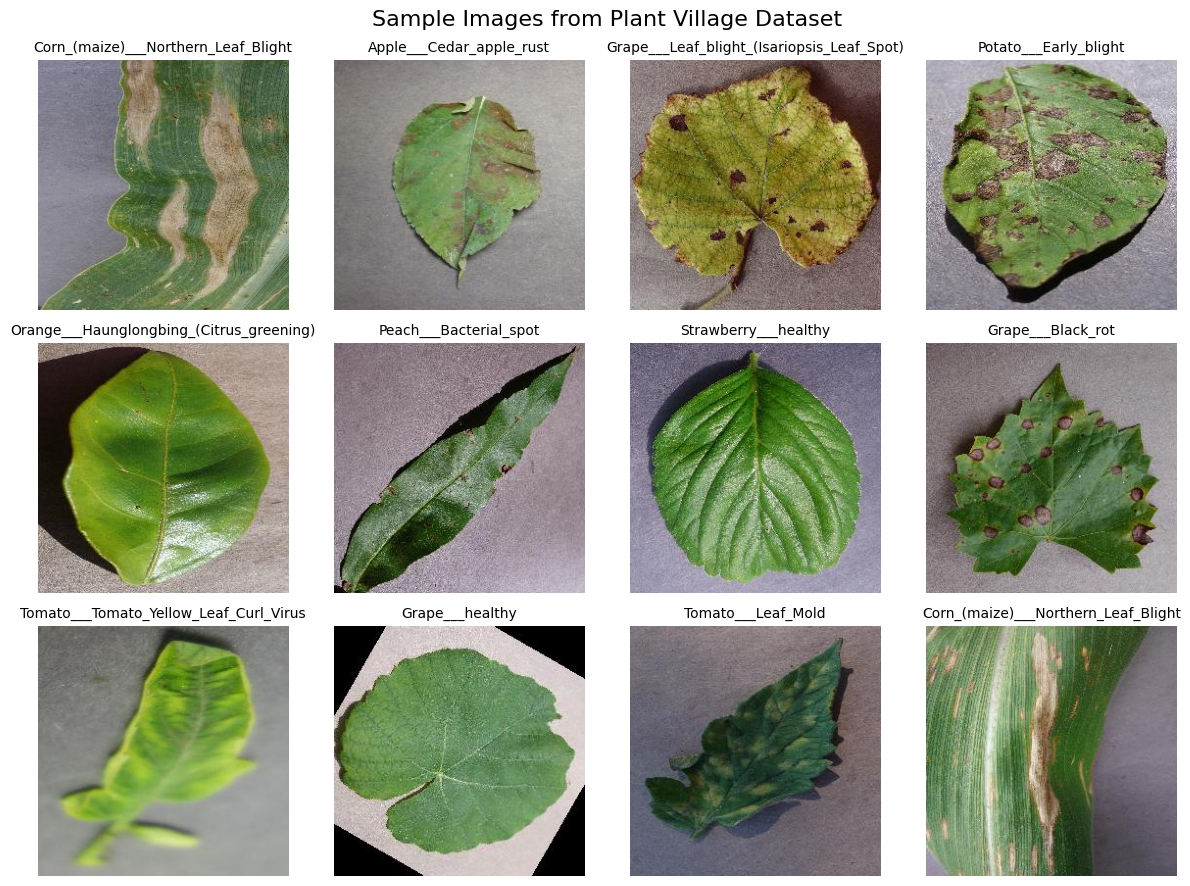

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import random

sample_df = df_train.sample(12)
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle('Sample Images from Plant Village Dataset', fontsize=16)

for ax, (_, row) in zip(axes.flatten(), sample_df.iterrows()):
    img = Image.open(row['filename'])
    ax.imshow(img)
    ax.set_title(row['label'], fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()


 
<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    Label Distribution Check
</div>

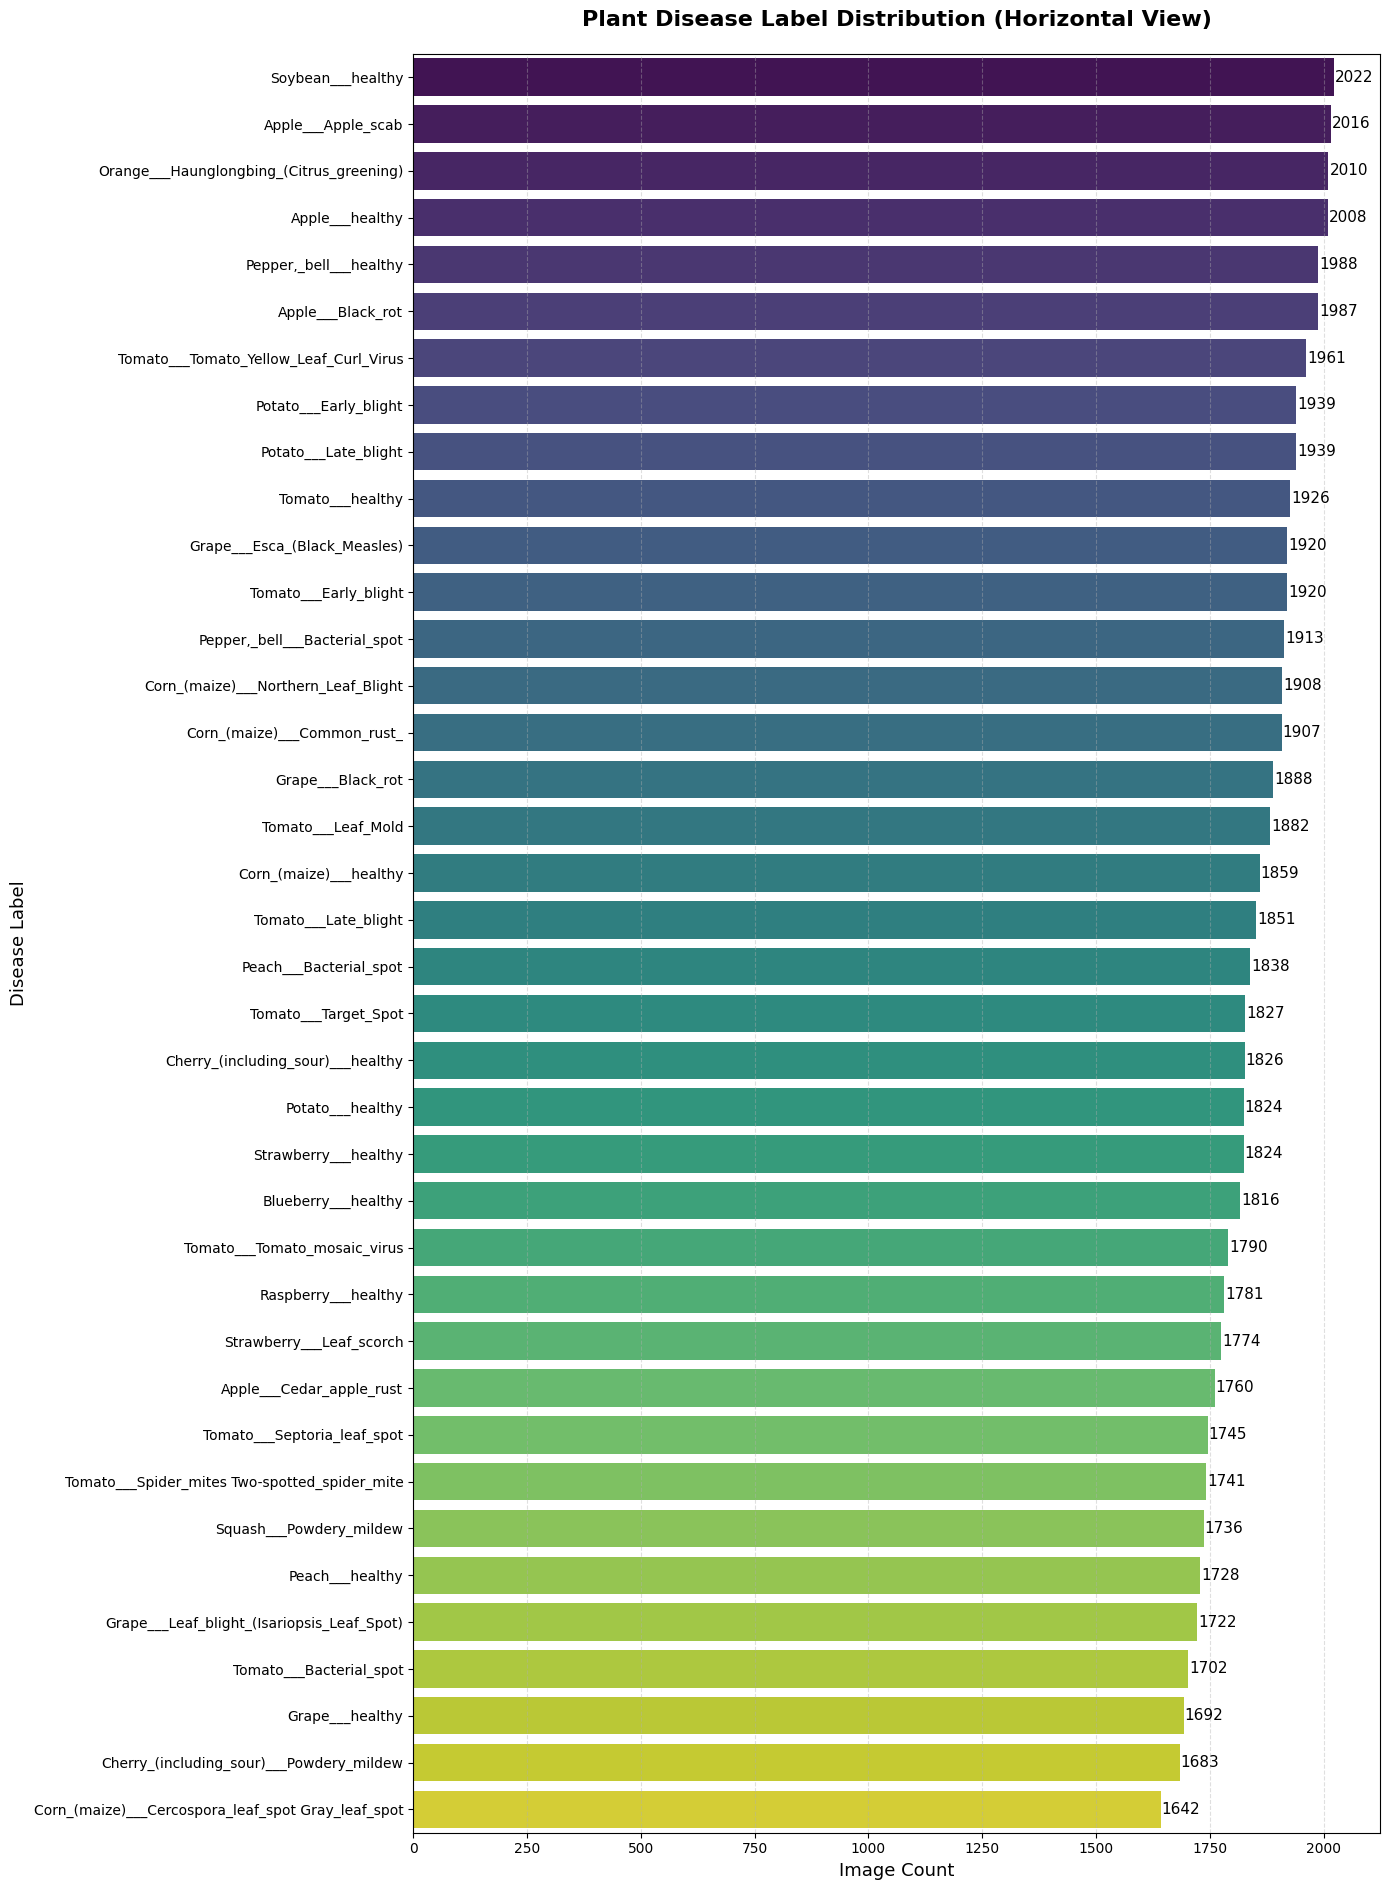

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting labels
label_counts = df_train['label'].value_counts()

plt.figure(figsize=(14, len(label_counts) * 0.5))  # Dynamic height based on number of labels
sns.barplot(y=label_counts.index, x=label_counts.values, palette='viridis', orient='h')


plt.xlabel('Image Count', fontsize=13)
plt.ylabel('Disease Label', fontsize=13)
plt.title('Plant Disease Label Distribution (Horizontal View)', fontsize=16, fontweight='bold', pad=20)


for i, (label, count) in enumerate(label_counts.items()):
    plt.text(count + 2, i, str(count), va='center', fontsize=11)

# Grid and layout
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [11]:
print(np.unique(label_train))

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
      Creating ImageDataGenerator for data augmentation and normalization

</div>

## 1.Image Data Generators

The codeblock sets up two separate generators for image data — one for **training** with biologically realistic augmentation, and one for **testing/validation** with only normalization to ensure fair evaluation.

---

### Training Data Generator (`data_gen`)

This generator normalizes pixel values and applies a variety of augmentations to simulate real-world variability in leaf images:

- `rescale=1./255` — scales pixel values to a range between 0 and 1.
- `rotation_range=25` — randomly rotates images by up to 25 degrees to mimic leaf angle variation.
- `width_shift_range=0.1` — shifts images horizontally by up to 10%.
- `height_shift_range=0.1` — shifts images vertically by up to 10%.
- `shear_range=0.25` — applies shearing transformations to simulate perspective changes.
- `zoom_range=0.25` — randomly zooms images in or out by up to 25%.
- `horizontal_flip=True` — flips images horizontally to reflect natural leaf orientation.
- `vertical_flip=False` — avoids unrealistic upside-down leaf positions.
- `brightness_range=[0.8, 1.2]` — simulates lighting differences (e.g., cloudy vs. sunny).
- `channel_shift_range=30.0` — introduces subtle color tone shifts to mimic camera or lighting variations.
- `fill_mode='nearest'` — fills empty pixels after transformations using nearest pixel values.

These transformations help the model generalize better to unseen leaf images with varied conditions.

---

### Testing/Validation Data Generator (`test_gen`)

This generator only normalizes the images:

- `rescale=1./255` — scales pixel values to between 0 and 1.

No augmentation is applied so that evaluation utilizes clean, unaltered images for accurate performance measurement.

---

### Common Settings

- `image_size = (224, 224)` — all images are resized to this shape before being passed into the model.
- `batch_size = 32` — the number of images processed together in each step during training or evaluation.

---





In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training generator with augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2],
    channel_shift_range=30.0,
    fill_mode='nearest'
)

# Testing/validation generator with only normalization
test_gen = ImageDataGenerator(rescale=1./255)

# Image size and batch size
image_size = (224, 224)
batch_size = 32

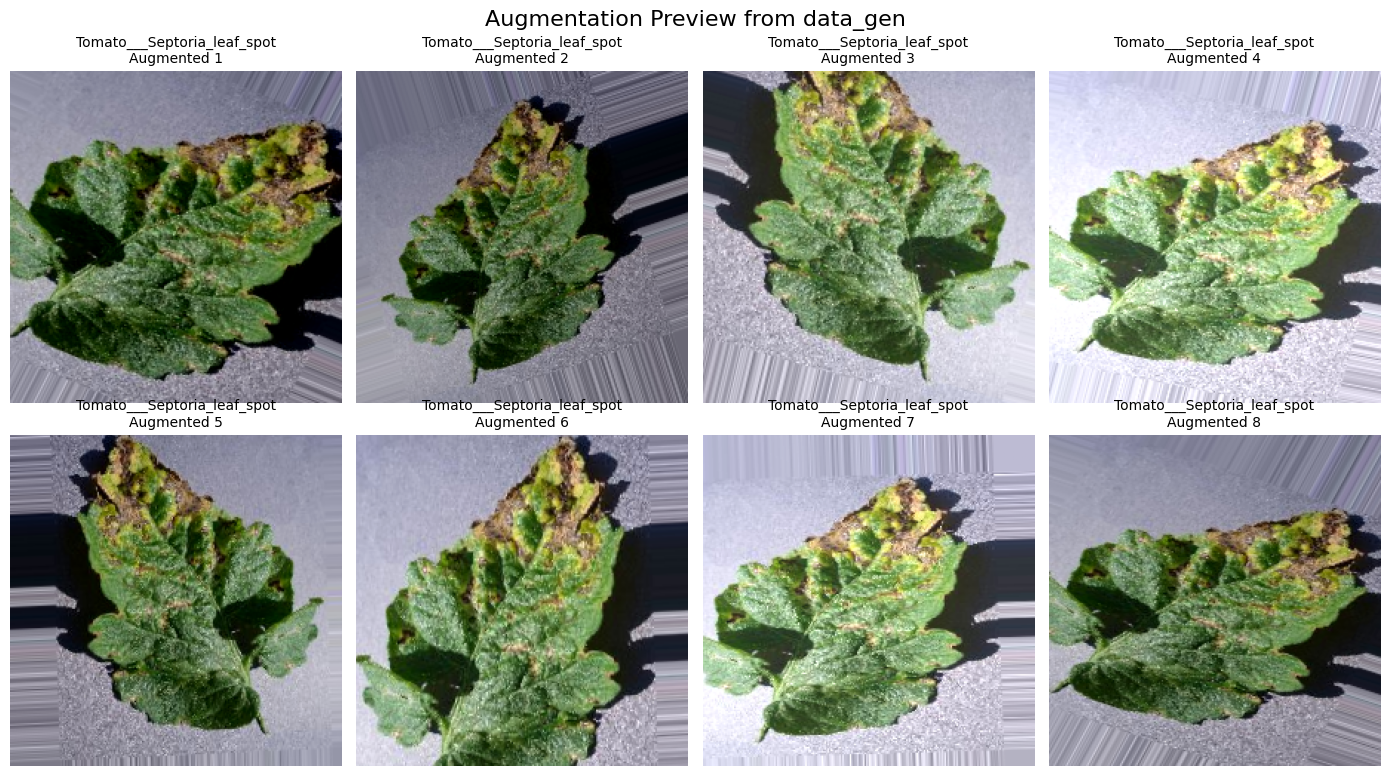

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Randomly select one image from df_train
preview_row = df_train.sample(n=1).iloc[0]
preview_path = preview_row['filename']
preview_label = preview_row['label']

# Load and preprocess the image
preview_img = load_img(preview_path, target_size=image_size)
preview_array = img_to_array(preview_img)
preview_array = np.expand_dims(preview_array, axis=0)

# Generating augmented versions using data_gen
preview_iter = data_gen.flow(preview_array, batch_size=1)

# Plotting 8 augmented versions
plt.figure(figsize=(14, 8))
for i in range(8):
    aug_img = next(preview_iter)[0]
    plt.subplot(2, 4, i+1)
    plt.imshow(aug_img.astype('float32'))
    plt.title(f"{preview_label}\nAugmented {i+1}", fontsize=10)
    plt.axis('off')

plt.suptitle("Augmentation Preview from data_gen", fontsize=16)
plt.tight_layout()
plt.show()


<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Creating data generators from DataFrames for training and validation
</div>


### 📦 Data Generators from DataFrames
using flow_from_dataframe() to create image data generators directly from Pandas DataFrames. This allows to efficiently load and preprocess images for training and validation.


In [14]:
# Training data flow from DataFrame
train_gen = data_gen.flow_from_dataframe(
    df_train,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 70295 validated image filenames belonging to 38 classes.



<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;"> Inspecting
</div>


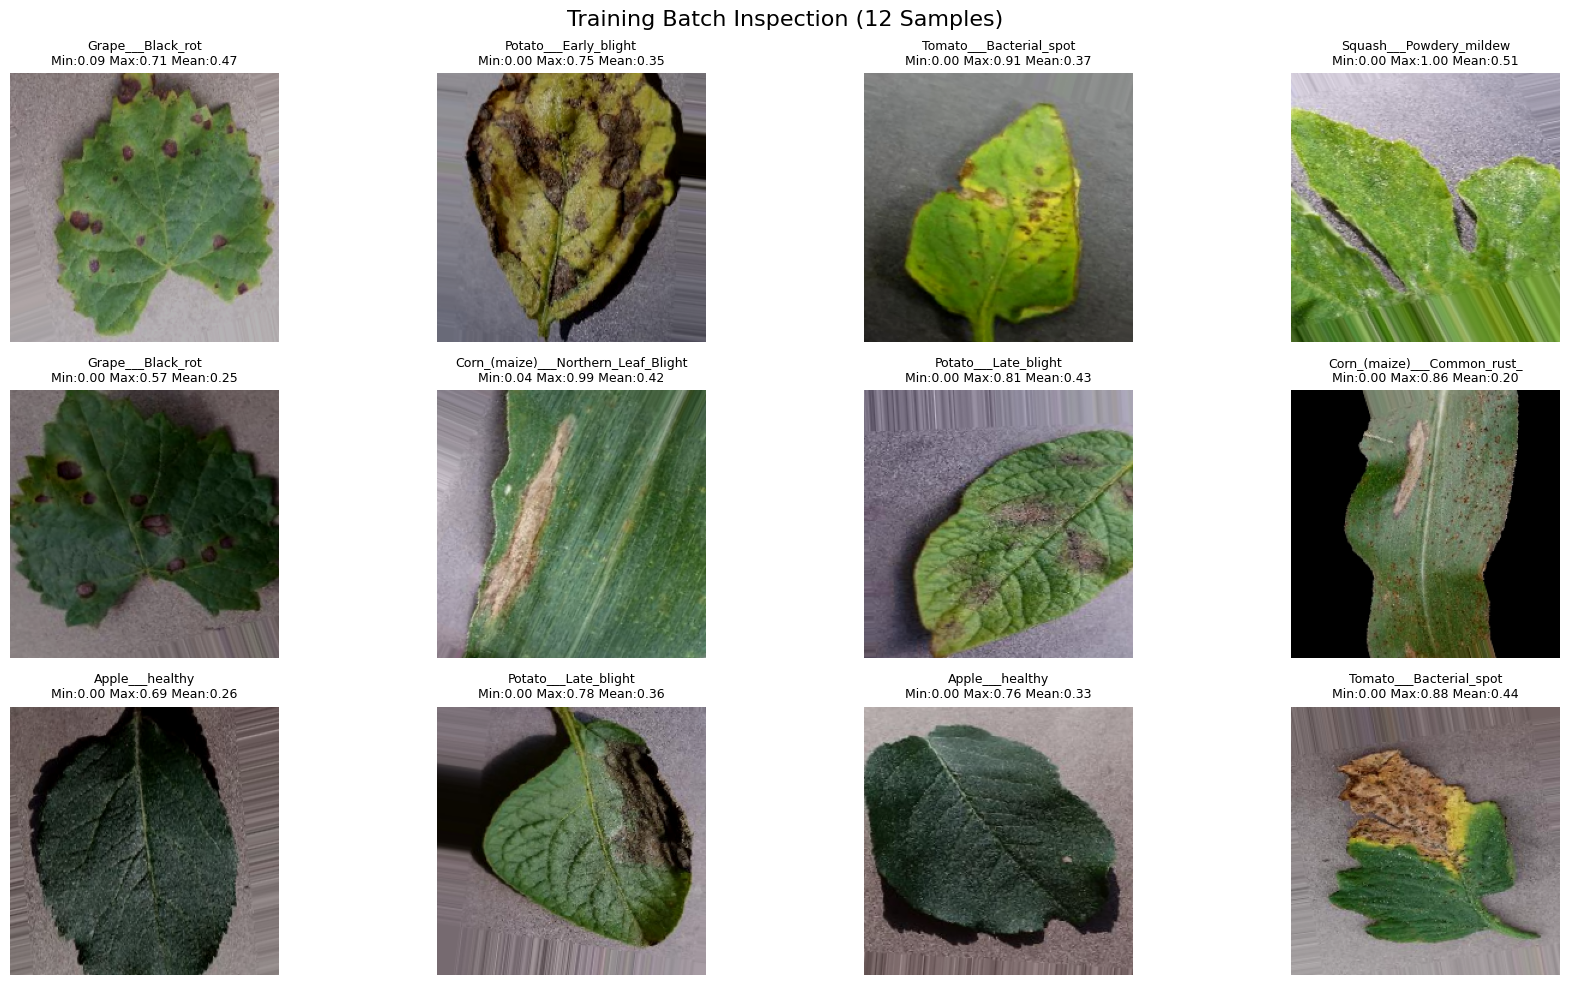

Image shape: (224, 224, 3), dtype: float32


In [15]:
# Fetching a batch from the training generator
class_dict = train_gen.class_indices
label_names = list(class_dict.keys())
images, labels = next(train_gen)
label_names = list(class_dict.keys())
plt.figure(figsize=(18, 10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    
    # Extracting label index and name
    label_index = np.argmax(labels[i])
    label_name = label_names[label_index]
    
    # Image statistics
    img_min = images[i].min()
    img_max = images[i].max()
    img_mean = images[i].mean()

    plt.title(f"{label_name}\nMin:{img_min:.2f} Max:{img_max:.2f} Mean:{img_mean:.2f}", fontsize=9)
    plt.axis('off')

plt.suptitle("Training Batch Inspection (12 Samples)", fontsize=16)
plt.tight_layout()
plt.show()

# Shape and dtype of images
print(f"Image shape: {images[0].shape}, dtype: {images[0].dtype}")


### 🧪 valid_gen – Validation Data Generator
What it does:
- Loads validation images and labels from df_valid
- Applies only normalization (no augmentation)
- Resizes images to match model input size
- Converts labels to categorical format
- Shuffles data to reduce evaluation bias


In [16]:
valid_gen = data_gen.flow_from_dataframe(
    df_valid,
    shuffle=False,
    x_col='filename',
    y_col='label',
    target_size=(image_size[0], image_size[1]),
    class_mode='categorical'
)

Found 17572 validated image filenames belonging to 38 classes.


In [17]:
# # Fetch one batch from the validation generator
# images, labels = next(valid_gen)

# # Plot the first 6 images and their labels
# plt.figure(figsize=(12, 6))
# for i in range(6):
#     plt.subplot(2, 3, i+1)
#     plt.imshow(images[i])
#     plt.title(f"Label: {np.argmax(labels[i])}")
#     plt.axis('off')
# plt.tight_layout()
# plt.show()


<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Checking class distribution and imbalance information for validation set 
</div>

In [18]:
df_valid['label'].value_counts() ### validating distribution on validation data, fairly distributed based on multiple classes


label
Soybean___healthy                                     505
Apple___Apple_scab                                    504
Orange___Haunglongbing_(Citrus_greening)              503
Apple___healthy                                       502
Apple___Black_rot                                     497
Pepper,_bell___healthy                                497
Tomato___Tomato_Yellow_Leaf_Curl_Virus                490
Potato___Early_blight                                 485
Potato___Late_blight                                  485
Tomato___healthy                                      481
Grape___Esca_(Black_Measles)                          480
Tomato___Early_blight                                 480
Pepper,_bell___Bacterial_spot                         478
Corn_(maize)___Northern_Leaf_Blight                   477
Corn_(maize)___Common_rust_                           477
Grape___Black_rot                                     472
Tomato___Leaf_Mold                                    470
Corn_(ma

In [19]:
df_train['label'].value_counts() ### validating distribution on train data, fairly distributed based on multiple classes

label
Soybean___healthy                                     2022
Apple___Apple_scab                                    2016
Orange___Haunglongbing_(Citrus_greening)              2010
Apple___healthy                                       2008
Pepper,_bell___healthy                                1988
Apple___Black_rot                                     1987
Tomato___Tomato_Yellow_Leaf_Curl_Virus                1961
Potato___Early_blight                                 1939
Potato___Late_blight                                  1939
Tomato___healthy                                      1926
Grape___Esca_(Black_Measles)                          1920
Tomato___Early_blight                                 1920
Pepper,_bell___Bacterial_spot                         1913
Corn_(maize)___Northern_Leaf_Blight                   1908
Corn_(maize)___Common_rust_                           1907
Grape___Black_rot                                     1888
Tomato___Leaf_Mold                                


<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Retrieving class indices mapping from the training generator
</div>

### 🏷️ Class Index Mapping
extracting the mapping between class labels and their corresponding integer indices using the class_indices attribute of the training data generator.


In [20]:
class_dict = train_gen.class_indices

print("📂 Class to Index Mapping:")
for label, index in class_dict.items():
    print(f"  • {label:<15} → {index}")

📂 Class to Index Mapping:
  • Apple___Apple_scab → 0
  • Apple___Black_rot → 1
  • Apple___Cedar_apple_rust → 2
  • Apple___healthy → 3
  • Blueberry___healthy → 4
  • Cherry_(including_sour)___Powdery_mildew → 5
  • Cherry_(including_sour)___healthy → 6
  • Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot → 7
  • Corn_(maize)___Common_rust_ → 8
  • Corn_(maize)___Northern_Leaf_Blight → 9
  • Corn_(maize)___healthy → 10
  • Grape___Black_rot → 11
  • Grape___Esca_(Black_Measles) → 12
  • Grape___Leaf_blight_(Isariopsis_Leaf_Spot) → 13
  • Grape___healthy → 14
  • Orange___Haunglongbing_(Citrus_greening) → 15
  • Peach___Bacterial_spot → 16
  • Peach___healthy → 17
  • Pepper,_bell___Bacterial_spot → 18
  • Pepper,_bell___healthy → 19
  • Potato___Early_blight → 20
  • Potato___Late_blight → 21
  • Potato___healthy → 22
  • Raspberry___healthy → 23
  • Soybean___healthy → 24
  • Squash___Powdery_mildew → 25
  • Strawberry___Leaf_scorch → 26
  • Strawberry___healthy → 27
  • Tomato___B


<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Creating a Convolutional Neural Network (CNN) model
</div>


<div style="
    background: linear-gradient(135deg, #1e3a5f, #008080);
    color: white;
    padding: 10px;
    text-align: left;
    font-size: 20px;
    border-radius: 5px;">
    The code block here defines a deep convolutional neural network for classifying plant leaf images into 38 classes. 
    It stacks multiple convolutional layers with increasing filters to extract features of varying complexity, 
    applies batch normalization to stabilize training, and uses max pooling to reduce spatial dimensions. 
    After feature extraction, the network flattens the data and passes it through dense layers with ReLU activation 
    for learning non-linear combinations of features. Dropout is included to prevent overfitting, and the final 
    softmax layer outputs class probabilities for the 38 categories.
</div>


## Model Architecture Overview

**Input Layer:**  
- Image size: 224×224×3 (RGB)

**Convolutional Blocks:**
1. **Block 1** — 2× Conv2D (64 filters, 3×3, ReLU, same padding) → BatchNorm → MaxPooling(2×2)  
2. **Block 2** — 2× Conv2D (128 filters, 3×3, ReLU) → BatchNorm → MaxPooling(2×2)  
3. **Block 3** — 2× Conv2D (128 filters, 3×3, ReLU) → BatchNorm → MaxPooling(2×2)  
4. **Block 4** — 2× Conv2D (256 filters, 3×3, ReLU) → BatchNorm → MaxPooling(2×2)  
5. **Block 5** — 2× Conv2D (512 filters, 3×3, ReLU) → BatchNorm → MaxPooling(2×2)  
6. **Block 6** — 2× Conv2D (512 filters, 3×3, ReLU) → BatchNorm → MaxPooling(2×2)  

**Fully Connected Layers:**
- Flatten  
- Dense(256, ReLU)  
- Dense(64, ReLU)  
- Dropout(0.3)  
- Dense(38, Softmax) — output layer for 38 plant disease classes

**Purpose:**  
- Early layers capture low‑level patterns (edges, textures).  
- Middle layers extract more complex leaf features.  
- Deeper layers learn highly specific disease patterns.  
- The fully connected part combines these features to classify into the 38 categories.  
- Dropout helps prevent overfitting, and Batch Normalization stabilizes and speeds up training.

In [21]:
Model = Sequential([
    Conv2D(64, kernel_size= (3,3),padding='same', activation='relu', input_shape=(image_size[0],image_size[1],3)),
    Conv2D(64, kernel_size= (3,3),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(128, kernel_size= (3,3),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    
    Conv2D(128, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(128, kernel_size= (3,3),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(256, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(256, kernel_size= (3,3),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(512, kernel_size= (3,3),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(512, kernel_size= (3,3),padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(38, activation='softmax') ])

I0000 00:00:1757151314.922048      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1757151314.922757      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


 
<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Displaying the summary of the CNN model architecture
</div>

In [22]:
print("🧬 CNN Model Summary:\n")
Model.summary()

🧬 CNN Model Summary:



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 10,905,382 (41.60 MB)

 Trainable params: 10,902,182 (41.59 MB)

 Non-trainable params: 3,200 (12.50 KB)

In [23]:
Model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Training the CNN model with early stopping
</div>


<div style="
    background: linear-gradient(135deg, #1e3a5f, #008080);
    color: white;
    padding: 10px;
    text-align: left;
    font-size: 18px;
    border-radius: 5px;">
    The model is trained for up to 40 epochs using the training data generator, 
    while evaluating its performance on the validation data generator after each epoch. 
    An early stopping callback monitors validation loss and halts training if there is no improvement 
    for 3 consecutive epochs, restoring the weights from the best-performing point. 
    This approach prevents overfitting by stopping before the model begins to memorize training data 
    and ensures the final model generalizes well to unseen images. 
    The verbose setting provides real-time feedback on progress, loss, and accuracy, 
    helping track whether the model is improving consistently during training.
</div>


In [24]:
history = Model.fit(
    train_gen,
    epochs=30,
    validation_data=valid_gen,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
    
    )

Epoch 1/30


I0000 00:00:1757151326.952993      67 service.cc:148] XLA service 0x7a91b0027cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757151326.953987      67 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1757151326.954015      67 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1757151327.823852      67 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1757151352.982401      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1652s 736ms/step - accuracy: 0.1481 - loss: 3.2208 - val_accuracy: 0.4540 - val_loss: 1.9144
Epoch 2/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1224s 557ms/step - accuracy: 0.6488 - loss: 1.2356 - val_accuracy: 0.7635 - val_loss: 0.7954
Epoch 3/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1186s 540ms/step - accuracy: 0.8417 - loss: 0.5522 - val_accuracy: 0.8368 - val_loss: 0.6101
Epoch 4/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1225s 557ms/step - accuracy: 0.9060 - loss: 0.3342 - val_accuracy: 0.9074 - val_loss: 0.3053
Epoch 5/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1258s 572ms/step - accuracy: 0.9298 - loss: 0.2381 - val_accuracy: 0.9256 - val_loss: 0.2481
Epoch 6/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1285s 585ms/step - accuracy: 0.9449 - loss: 0.1865 - val_accuracy: 0.9568 - val_loss: 0.1514
Epoch 7/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1301s 592ms/step - accuracy: 0.9590 - loss: 0.1459 - val_accuracy: 0.9477 - val_loss: 0.1907
Epoch 8/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1289s 587ms/step - accur

<div style="
    background: linear-gradient(135deg, #1e3a5f, #008080);
    color: white;
    padding: 10px;
    text-align: center;
    font-size: 18px;
    border-radius: 5px;">
    Loads all images from the test directory into a TensorFlow dataset without labels, 
    resizes them to the target image size, and preserves their original order for inference.
</div>


In [25]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(image_size[0], image_size[1]),
    shuffle=False,
    labels=None  
)

Found 33 files.



<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
      Evaluating the CNN model on training and validation data
</div>

In [26]:
print(Model.evaluate(train_gen))
print(Model.evaluate(valid_gen))


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 971s 442ms/step - accuracy: 0.9899 - loss: 0.0318
[0.03102871961891651, 0.9902980327606201]
550/550 ━━━━━━━━━━━━━━━━━━━━ 243s 441ms/step - accuracy: 0.9847 - loss: 0.0558
[0.043159451335668564, 0.986854076385498]



<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Saving the trained CNN model
</div>


In [27]:
Model.save('aidhunikkrishimodel5.keras')

<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    Making predictions on the validation dataset and extracting class labels
</div>


In [28]:
preds = Model.predict(valid_gen)
y_pred = np.argmax(preds, axis=1)

550/550 ━━━━━━━━━━━━━━━━━━━━ 223s 403ms/step


<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    Plotting a confusion matrix to visualize model performance on validation data

</div>


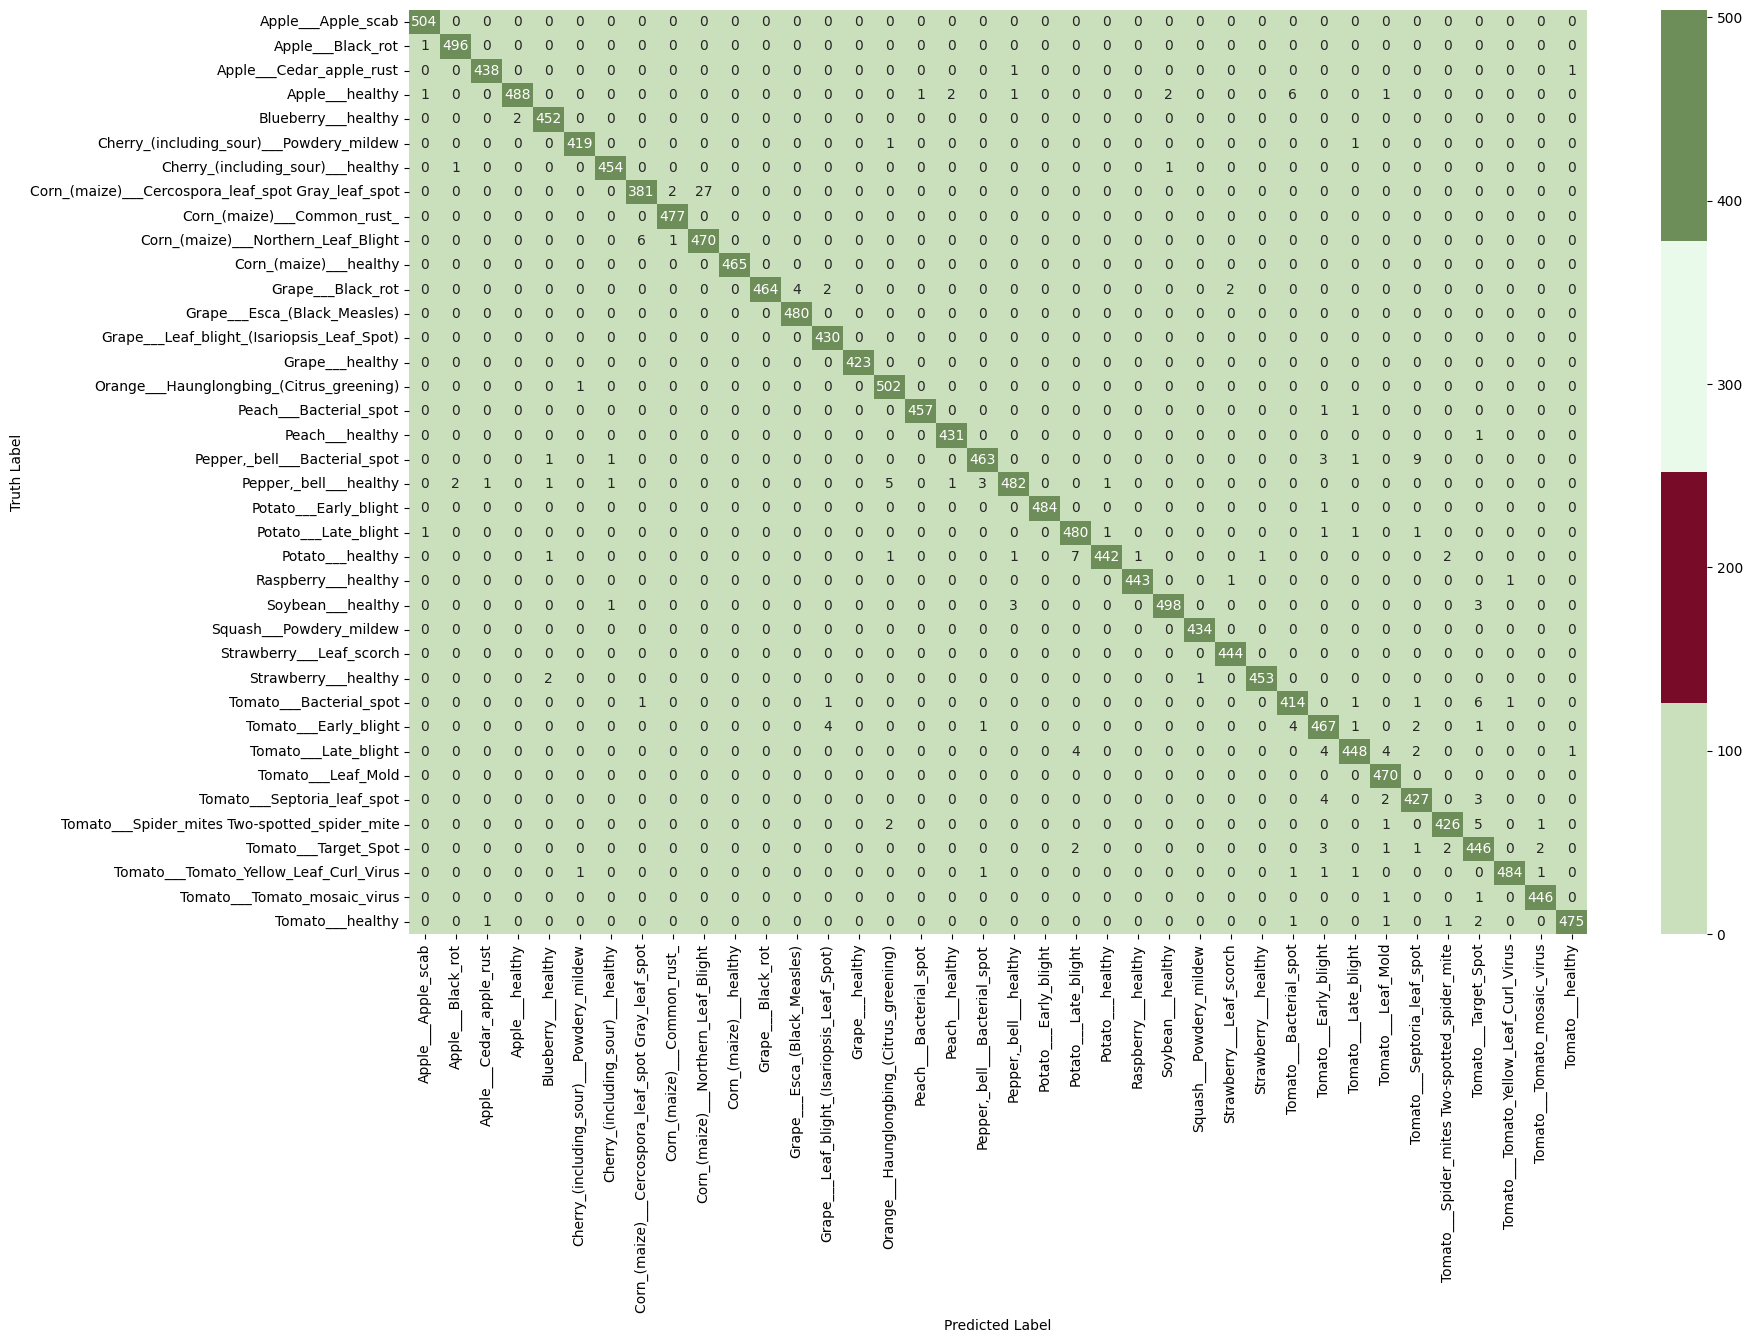

In [29]:
color = ['#CAE0BC','#780C28','#EAFAEA','#6E8E59']
cm = confusion_matrix(valid_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(19,12))
sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()


<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Plotting the training and validation accuracy and loss over epochs

</div>


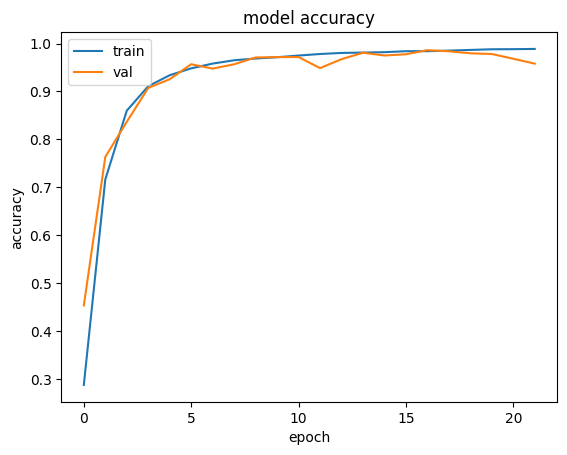

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

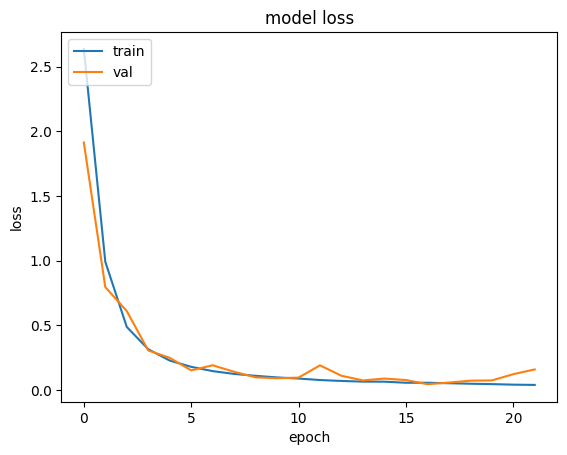

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

 
<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     predict the class of an input image and visualize probabilities
</div>



In [32]:
def predict(img_path):
    # Get class labels
    labels = list(class_dict.keys())

    # Loading and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img_array = np.expand_dims(np.asarray(resized_img) / 255.0, axis=0)

    # Predictions
    predictions = Model.predict(img_array)
    probs = predictions[0]

    # Sort by probability (highest first)
    sorted_idx = np.argsort(probs)[::-1]
    sorted_labels = [labels[i] for i in sorted_idx]
    sorted_probs = probs[sorted_idx]

    # Plot
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Left: image
    ax[0].imshow(resized_img)
    ax[0].axis('off')
    ax[0].set_title("Input Image", fontsize=16)

    # Right: probability bar chart
    bars = ax[1].barh(sorted_labels, sorted_probs, color=plt.cm.viridis(sorted_probs))
    ax[1].invert_yaxis()  # Highest prob on top
    ax[1].set_xlabel('Probability', fontsize=14)
    ax[1].set_xlim(0, 1)

    # Adding probability text on bars
    for bar, prob in zip(bars, sorted_probs):
        ax[1].text(prob + 0.02, bar.get_y() + bar.get_height()/2, f"{prob:.2f}",
                   va='center', fontsize=12)

    ax[1].set_title("Prediction Probabilities", fontsize=16)
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


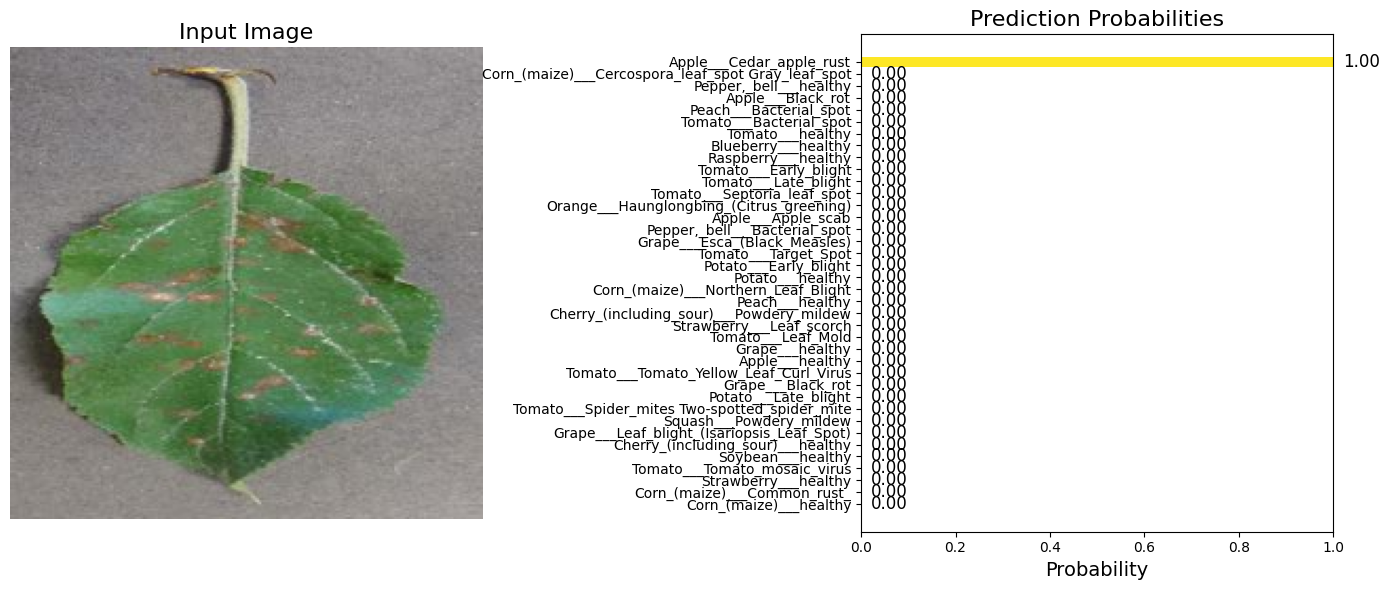

In [33]:
predict('/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust2.JPG')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


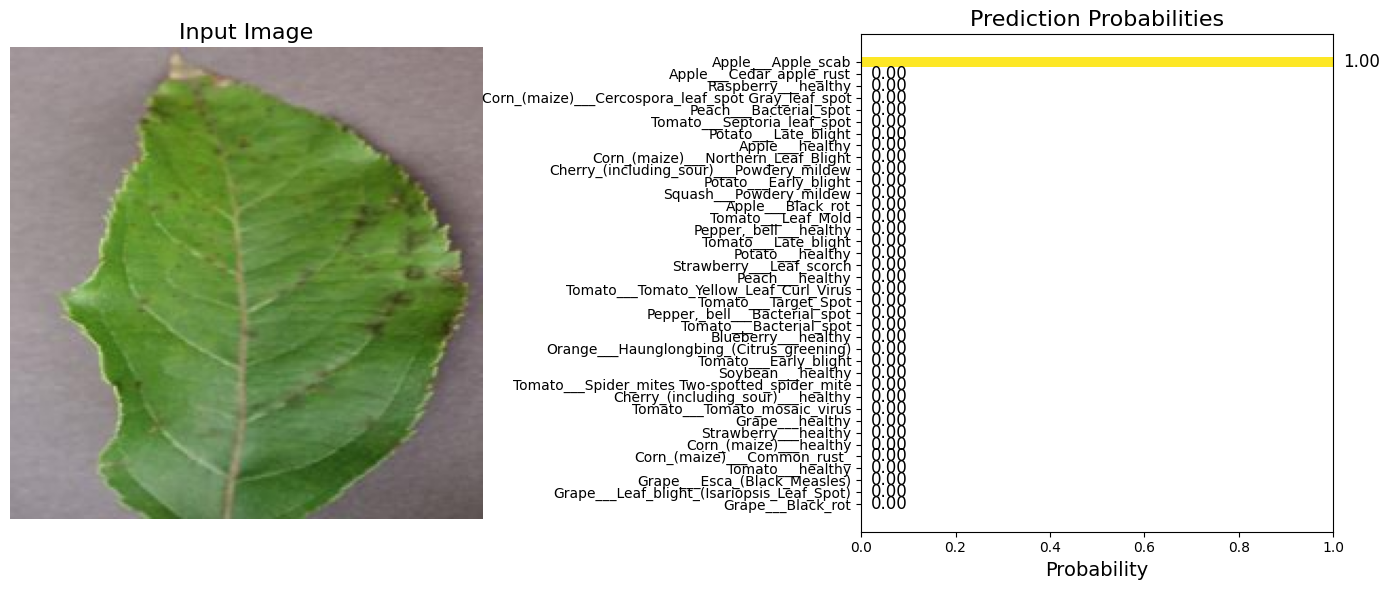

In [34]:
predict('/kaggle/input/new-plant-diseases-dataset/test/test/AppleScab1.JPG')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


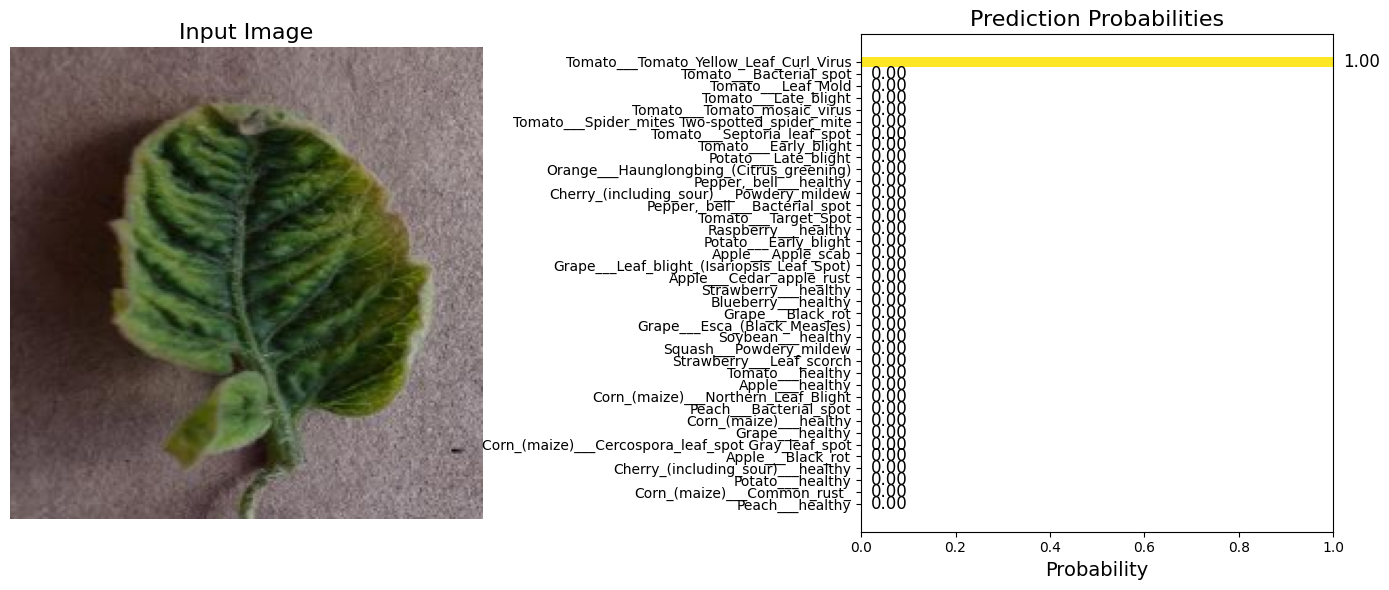

In [35]:
predict('/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus2.JPG')


<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
      Extended Model Evaluation and Performance Metrics 
</div>


550/550 ━━━━━━━━━━━━━━━━━━━━ 224s 407ms/step


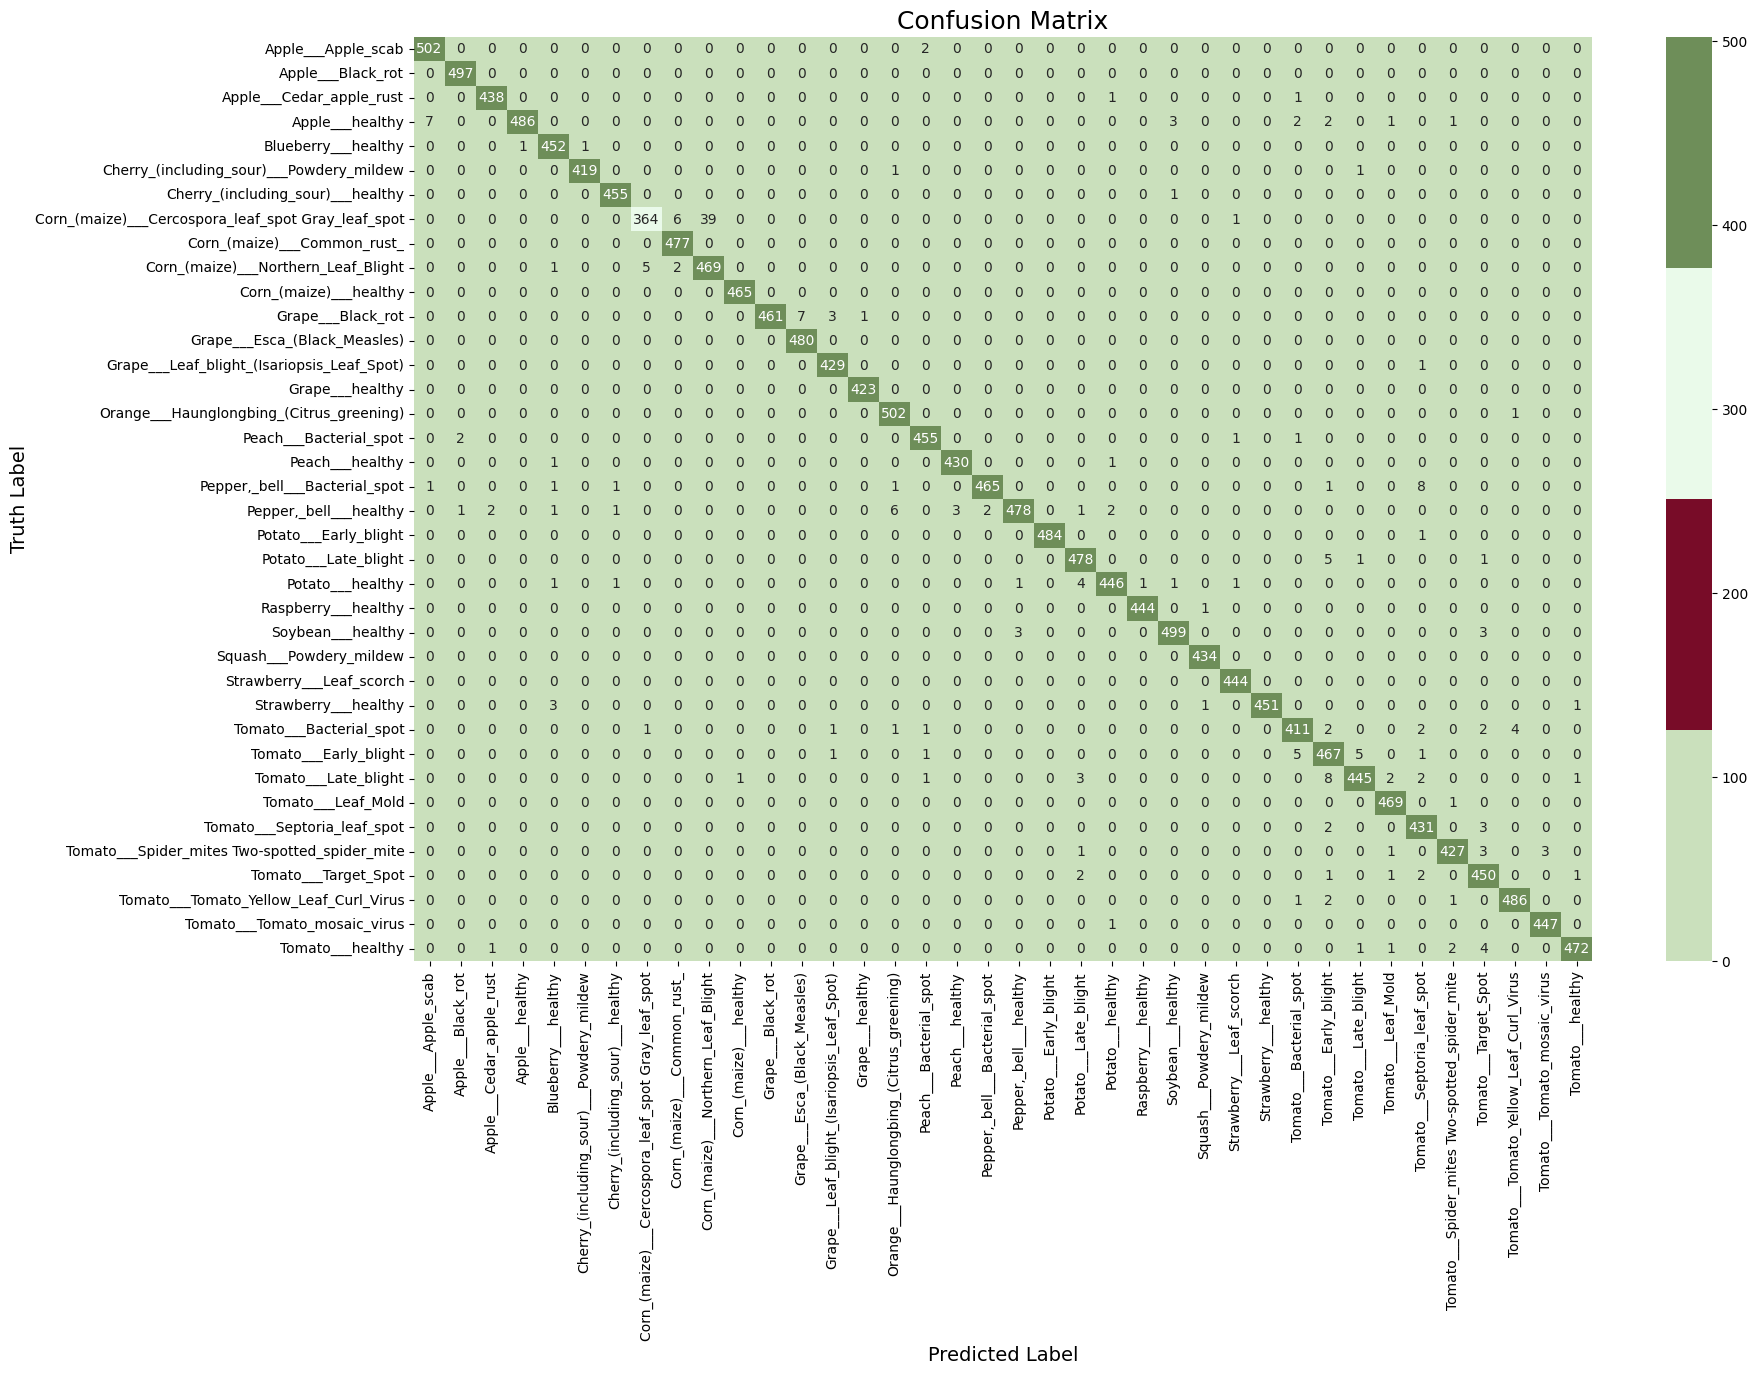


### Classification Report ###

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      1.00      0.99       504
                                 Apple___Black_rot       0.99      1.00      1.00       497
                          Apple___Cedar_apple_rust       0.99      1.00      0.99       440
                                   Apple___healthy       1.00      0.97      0.98       502
                               Blueberry___healthy       0.98      1.00      0.99       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       0.99      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.89      0.93       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Bli

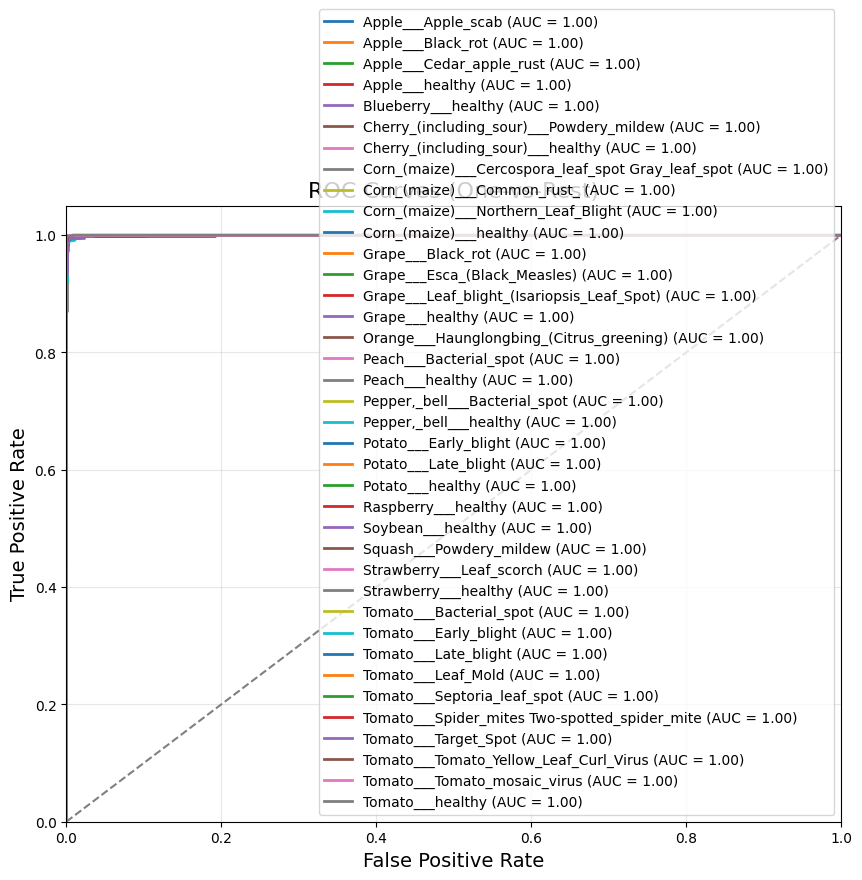

Macro-average AUC: 0.9999
Micro-average AUC: 1.0000


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Predictions & Ground Truth
preds = Model.predict(valid_gen)
y_pred = np.argmax(preds, axis=1)
y_true = valid_gen.classes 
labels = list(class_dict.keys())     

# -----Confusion Matrix-----
color = ['#CAE0BC', '#780C28', '#EAFAEA', '#6E8E59']
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(19, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap=color,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Truth Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# -----Classification Report-----
print("\n### Classification Report ###\n")
print(classification_report(y_true, y_pred, target_names=labels))

# -----ROC Curves (One-vs-Rest)-----
y_true_bin = label_binarize(y_true, classes=range(len(labels)))
n_classes = y_true_bin.shape[1]

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{labels[i]} (AUC = {roc_auc:.2f})")

# Diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves (One-vs-Rest)', fontsize=16)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# -----Macro & Micro Average AUC-----
macro_auc = roc_auc_score(y_true_bin, preds, multi_class='ovr', average='macro')
micro_auc = roc_auc_score(y_true_bin, preds, multi_class='ovr', average='micro')

print(f"Macro-average AUC: {macro_auc:.4f}")
print(f"Micro-average AUC: {micro_auc:.4f}")

<div style="background: linear-gradient(135deg, #1e3a5f, #008080); color: white; padding: 10px; text-align: center; font-size: 30px; border-radius: 5px;">
    Thanks!  
    <br>
    <img src="https://raw.githubusercontent.com/iamutkrista98/testingout/refs/heads/main/projectlogo1.png" 
         alt="AIDHUNIK KRISHI" 
         style="width: 80%; max-width: 600px; margin-top: 10px; border-radius: 10px;">
</div>
